In [1]:
import pandas as pd
import numpy as np
from numpy import nan as NaN
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")
cancer = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
cancer_name=cancer.columns.values
cancer_name=cancer_name.tolist()
cancer=cancer[cancer_name].replace("?",np.nan)
cancer.head()
cancer = cancer.drop(labels=['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)
cancer['STDs: Number of diagnosis'] = cancer['STDs: Number of diagnosis']
cancer['STDs: Number of diagnosis'] = ((cancer['STDs: Number of diagnosis']) >0 )*1 
cancer['First sexual intercourse'] = cancer['First sexual intercourse'].fillna(cancer['First sexual intercourse'].median())
cancer['First sexual intercourse'] = cancer['First sexual intercourse'].astype('float')
cancer['First sexual intercourse']=cancer['First sexual intercourse'].astype(float)
cancer['sex_years_new']=cancer['Age']-cancer['First sexual intercourse']
cancer.isnull().sum()
cancer['Smokes (packs/year)'] = cancer['Smokes (packs/year)'].fillna(cancer['Smokes (packs/year)'].median()).astype('float')
cancer['Smokes (years)'] = cancer['Smokes (years)'].fillna(value=0.0).astype('float')
cancer['Smokes'] = cancer['Smokes'].fillna(cancer['Smokes'].median()).astype('float')
cancer['Smokes'].value_counts()
cancer['Num of pregnancies'] = cancer['Num of pregnancies'].fillna(cancer['Num of pregnancies'].median())
cancer['Num of pregnancies'] = cancer['Num of pregnancies'].astype('float')
cancer['Number of sexual partners'] = cancer['Number of sexual partners'].fillna(cancer['Number of sexual partners'].median())
cancer['Number of sexual partners'] = cancer['Number of sexual partners'].astype('float')
cancer['Hormonal Contraceptives'] = cancer['Hormonal Contraceptives'].fillna(cancer['Hormonal Contraceptives'].median())
cancer['Hormonal Contraceptives'] = cancer['Hormonal Contraceptives'].astype('float')
cancer['Hormonal Contraceptives (years)'] = cancer['Hormonal Contraceptives (years)'].fillna(cancer['Hormonal Contraceptives (years)'].median())
cancer['Hormonal Contraceptives (years)'] = cancer['Hormonal Contraceptives (years)'].astype('float')
cancer['IUD (years)'] = cancer['IUD (years)'].fillna(cancer['IUD (years)'].median())
cancer['IUD (years)'] = cancer['IUD (years)'].astype('float')
cancer['IUD'] = cancer['IUD'].fillna(cancer['IUD'].median()).astype('float')
cancer['IUD'] = cancer['IUD'].astype('float')
cancer['STDs'] = cancer['STDs'].fillna(cancer['STDs'].median()).astype('float')
cancer['STDs (number)'] = cancer['STDs (number)'].fillna(cancer['STDs (number)'].median()).astype('float')
cancer['STDs:condylomatosis'] = cancer['STDs:condylomatosis'].fillna(cancer['STDs:condylomatosis'].median()).astype('float')
cancer['STDs:cervical condylomatosis'] = cancer['STDs:cervical condylomatosis'].fillna(cancer['STDs:cervical condylomatosis'].median()).astype('float')
cancer['STDs:vaginal condylomatosis'] = cancer['STDs:vaginal condylomatosis'].fillna(cancer['STDs:vaginal condylomatosis'].median()).astype('float')
cancer['STDs:vulvo-perineal condylomatosis'] = cancer['STDs:vulvo-perineal condylomatosis'].fillna(cancer['STDs:vulvo-perineal condylomatosis'].median()).astype('float')

cancer['STDs:syphilis'] = cancer['STDs:syphilis'].fillna(cancer['STDs:syphilis'].median()).astype('float')
cancer['STDs:pelvic inflammatory disease'] = cancer['STDs:pelvic inflammatory disease'].fillna(cancer['STDs:pelvic inflammatory disease'].median()).astype('float')
cancer['STDs:genital herpes'] = cancer['STDs:genital herpes'].fillna(cancer['STDs:genital herpes'].median()).astype('float')
cancer['STDs:molluscum contagiosum'] = cancer['STDs:molluscum contagiosum'].fillna(cancer['STDs:molluscum contagiosum'].median()).astype('float')

cancer['STDs:AIDS'] = cancer['STDs:AIDS'].fillna(cancer['STDs:AIDS'].median()).astype('float')
cancer['STDs:HIV'] = cancer['STDs:HIV'].fillna(cancer['STDs:HIV'].median()).astype('float')
cancer['STDs:Hepatitis B'] = cancer['STDs:Hepatitis B'].fillna(cancer['STDs:Hepatitis B'].median()).astype('float')
cancer['STDs:HPV'] = cancer['STDs:HPV'].fillna(cancer['STDs:HPV'].median()).astype('float')

In [2]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
Y=cancer[['Biopsy']]
X=cancer.drop(['Hinselmann', 'Schiller','Citology', 'Biopsy', 'sex_years_new'], axis=1)
smo = SMOTE(random_state=42)
columns = X.columns

X_smo, y_smo = smo.fit_sample(X, Y)
os_data_X = pd.DataFrame(data=X_smo,columns=columns )
os_data_y= pd.DataFrame(data=y_smo,columns=['y'])

Using TensorFlow backend.


In [38]:
X_train, X_test, Y_train, Y_test= train_test_split(os_data_X, os_data_y, test_size=0.2)
random_forest = RandomForestClassifier(random_state=10,n_estimators=300,min_samples_split=3,oob_score=True)
random_forest=random_forest.fit(X_train, Y_train)
print('Random Forest train score: '+str(round(random_forest.score(X_train, Y_train) * 100, 2)))
print('Random Forest test score: '+str(round(random_forest.score(X_test, Y_test) * 100, 2)))

Random Forest train score: 99.92
Random Forest test score: 97.2


In [40]:
from sklearn.model_selection import cross_val_score

Forest_scores = cross_val_score(estimator=random_forest ,
                         X=os_data_X,
                         y=os_data_y,
                         cv=20,
                         n_jobs=1)
print('Random Forest accuracy scores: %s' % Forest_scores)

print('Random Forest accuracy: %.3f +/- %.3f' % (np.mean(Forest_scores), np.std(Forest_scores)))

Random Forest accuracy scores: [0.68292683 0.86585366 0.98780488 0.9875     0.975      0.9875
 1.         0.9875     1.         0.9875     1.         1.
 1.         1.         1.         0.9875     0.9875     0.975
 0.975      1.        ]
Random Forest accuracy: 0.969 +/- 0.072


In [49]:
from sklearn.model_selection import cross_val_score

Forest_scores = cross_val_score(estimator=random_forest ,
                         X=os_data_X,
                         y=os_data_y,
                         cv=10,
                         n_jobs=1)
print('Random Forest accuracy scores: %s' % Forest_scores)

print('Random Forest accuracy: %.3f +/- %.3f' % (np.mean(Forest_scores), np.std(Forest_scores)))

Random Forest accuracy scores: [0.74074074 0.99382716 0.96296296 0.99375    0.98125    1.
 1.         0.99375    0.98125    0.98125   ]
Random Forest accuracy: 0.963 +/- 0.075


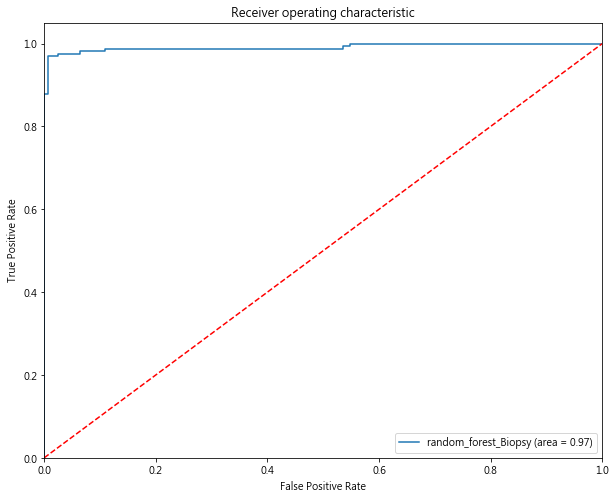

In [41]:
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, random_forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, random_forest.predict_proba(X_test)[:,1])
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (10,8))
plt.plot(fpr, tpr, label='random_forest_Biopsy (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [42]:
y_pred_random_forest = random_forest.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix_random_forest = confusion_matrix(Y_test, y_pred_random_forest)
print(confusion_matrix_random_forest)

[[153   4]
 [  5 160]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       157
           1       0.98      0.97      0.97       165

    accuracy                           0.97       322
   macro avg       0.97      0.97      0.97       322
weighted avg       0.97      0.97      0.97       322



In [45]:
from sklearn.feature_selection import RFECV
compare1=['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies','Hormonal Contraceptives', 'Hormonal Contraceptives (years)','STDs','Dx:HPV']
selector = RFECV(RandomForestClassifier(n_estimators=250,min_samples_split=20),cv=20,n_jobs=-1)
selector.fit(os_data_X[compare1], os_data_y)

print(selector.support_)
print("N_features %s" % selector.n_features_)
print(selector.ranking_)
print(selector.grid_scores_*100)

[ True  True  True  True  True  True  True  True]
N_features 8
[1 1 1 1 1 1 1 1]
[82.99237805 90.16006098 91.90396341 93.08689024 94.08536585 94.89329268
 95.32469512 95.88109756]


In [46]:
X_train, X_test, Y_train, Y_test= train_test_split(os_data_X[compare1], os_data_y, test_size=0.2)
random_forest = RandomForestClassifier(random_state=10,n_estimators=300,min_samples_split=3,oob_score=True)
random_forest=random_forest.fit(X_train, Y_train)
print('Random Forest train score: '+str(round(random_forest.score(X_train, Y_train) * 100, 2)))
print('Random Forest test score: '+str(round(random_forest.score(X_test, Y_test) * 100, 2)))

Random Forest train score: 99.92
Random Forest test score: 96.58


In [47]:
from sklearn.model_selection import cross_val_score

Forest_scores = cross_val_score(estimator=random_forest ,
                         X=os_data_X[compare1],
                         y=os_data_y,
                         cv=20,
                         n_jobs=1)
print('Random Forest accuracy scores: %s' % Forest_scores)

print('Random Forest accuracy: %.3f +/- %.3f' % (np.mean(Forest_scores), np.std(Forest_scores)))

Random Forest accuracy scores: [0.68292683 0.84146341 0.98780488 0.9875     1.         0.975
 0.9875     1.         0.9875     0.975      1.         1.
 1.         1.         1.         0.9875     0.975      0.9875
 0.9875     1.        ]
Random Forest accuracy: 0.968 +/- 0.074


In [48]:
from sklearn.model_selection import cross_val_score

Forest_scores = cross_val_score(estimator=random_forest ,
                         X=os_data_X[compare1],
                         y=os_data_y,
                         cv=10,
                         n_jobs=1)
print('Random Forest accuracy scores: %s' % Forest_scores)

print('Random Forest accuracy: %.3f +/- %.3f' % (np.mean(Forest_scores), np.std(Forest_scores)))

Random Forest accuracy scores: [0.74074074 0.98148148 0.98148148 0.99375    0.9875     1.
 1.         0.99375    0.98125    1.        ]
Random Forest accuracy: 0.966 +/- 0.075


In [50]:
y_pred_random_forest = random_forest.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix_random_forest = confusion_matrix(Y_test, y_pred_random_forest)
print(confusion_matrix_random_forest)

[[165   1]
 [ 10 146]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       166
           1       0.99      0.94      0.96       156

    accuracy                           0.97       322
   macro avg       0.97      0.96      0.97       322
weighted avg       0.97      0.97      0.97       322



# 2.支援向量機

In [56]:
# SVM
svc  = SVC(C=100,probability=True)
svc=svc.fit(X_train, Y_train)

print('SVM train score: '+str(round(svc.score(X_train, Y_train) * 100, 2)))
print('SVM test score: '+str(round(svc.score(X_test, Y_test) * 100, 2)))

SVM train score: 100.0
SVM test score: 91.61


In [57]:
from sklearn.model_selection import cross_val_score

svc_scores = cross_val_score(estimator=svc ,
                         X=os_data_X[compare1],
                         y=os_data_y,
                         cv=20,
                         n_jobs=1)
print('Random Forest accuracy scores: %s' % svc_scores)

print('Random Forest accuracy: %.3f +/- %.3f' % (np.mean(svc_scores), np.std(svc_scores)))

Random Forest accuracy scores: [0.90243902 0.79268293 0.92682927 0.925      0.9        0.9375
 0.925      0.925      0.9125     0.9375     0.95       0.9875
 0.925      0.95       0.9625     0.9125     0.975      0.9125
 0.925      0.975     ]
Random Forest accuracy: 0.928 +/- 0.039


In [58]:
from sklearn.model_selection import cross_val_score

svc_scores = cross_val_score(estimator=svc ,
                         X=os_data_X[compare1],
                         y=os_data_y,
                         cv=10,
                         n_jobs=1)
print('Random Forest accuracy scores: %s' % svc_scores)

print('Random Forest accuracy: %.3f +/- %.3f' % (np.mean(svc_scores), np.std(svc_scores)))

Random Forest accuracy scores: [0.82098765 0.91358025 0.90740741 0.9        0.91875    0.96875
 0.93125    0.9375     0.95       0.93125   ]
Random Forest accuracy: 0.918 +/- 0.038


# 3.knn

In [59]:
# knn
knn = KNeighborsClassifier(n_neighbors=4)
knn=knn.fit(X_train, Y_train)

print('KNN train score: '+str(round(knn.score(X_train, Y_train) * 100, 2)))
print('KNN test score: '+str(round(knn.score(X_test, Y_test) * 100, 2)))

KNN train score: 91.28
KNN test score: 83.23


In [60]:
from sklearn.model_selection import cross_val_score

knn_scores = cross_val_score(estimator=knn ,
                         X=os_data_X[compare1],
                         y=os_data_y,
                         cv=20,
                         n_jobs=1)
print('Random Forest accuracy scores: %s' % knn_scores)

print('Random Forest accuracy: %.3f +/- %.3f' % (np.mean(knn_scores), np.std(knn_scores)))

Random Forest accuracy scores: [0.82926829 0.79268293 0.79268293 0.8375     0.825      0.8875
 0.925      0.8375     0.75       0.875      0.9375     0.9125
 0.8375     0.8875     0.85       0.725      0.85       0.8875
 0.875      0.8875    ]
Random Forest accuracy: 0.850 +/- 0.054


6.xgboost

In [61]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

gbm = xgb.XGBClassifier(learning_rate= 0.05, max_depth= 4, n_estimators=400).fit(X_train, Y_train)

print('xgboost train score: '+str(round(gbm.score(X_train, Y_train) * 100, 2)))
print('xgboost test score: '+str(round(gbm.score(X_test, Y_test) * 100, 2)))

xgboost train score: 98.36
xgboost test score: 94.72


In [62]:
from sklearn.model_selection import cross_val_score

xgb_scores = cross_val_score(estimator=gbm ,
                         X=os_data_X[compare1],
                         y=os_data_y,
                         cv=20,
                         n_jobs=1)
print('xgboost accuracy scores: %s' % xgb_scores)

print('xgboost accuracy: %.3f +/- %.3f' % (np.mean(xgb_scores), np.std(xgb_scores)))

xgboost accuracy scores: [0.57317073 0.82926829 0.96341463 0.9875     0.9875     0.975
 0.9875     1.         1.         1.         1.         1.
 1.         1.         1.         0.9625     0.9875     1.
 0.95       1.        ]
xgboost accuracy: 0.960 +/- 0.096


# 7.強化學習-投票法(VotingClassifier)

In [73]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[
            ('xgb', gbm), ('SVM', svc), (' Random Forest', random_forest),
             ], voting='hard')
eclf1=eclf1.fit(X_train, Y_train)

print('投票 train score: '+str(round(eclf1.score(X_train, Y_train) * 100, 2)))
print('投票 test score: '+str(round(eclf1.score(X_test, Y_test) * 100, 2)))

投票 train score: 99.92
投票 test score: 96.27


In [74]:
from sklearn.model_selection import cross_val_score

ens_clf_scores = cross_val_score(estimator=eclf1 ,
                         X=os_data_X[compare1],
                         y=os_data_y,
                         cv=20,
                         n_jobs=1)
print('xgboost accuracy scores: %s' % ens_clf_scores)

print('xgboost accuracy: %.3f +/- %.3f' % (np.mean(ens_clf_scores), np.std(ens_clf_scores)))

xgboost accuracy scores: [0.68292683 0.86585366 0.98780488 0.9875     1.         0.975
 0.9875     1.         0.9875     1.         1.         1.
 1.         1.         1.         0.9875     0.9875     1.
 0.9875     1.        ]
xgboost accuracy: 0.972 +/- 0.072


In [75]:
from sklearn.model_selection import cross_val_score

ens_clf_scores = cross_val_score(estimator=eclf1 ,
                         X=os_data_X[compare1],
                         y=os_data_y,
                         cv=10,
                         n_jobs=1)
print('xgboost accuracy scores: %s' % ens_clf_scores)

print('xgboost accuracy: %.3f +/- %.3f' % (np.mean(ens_clf_scores), np.std(ens_clf_scores)))

xgboost accuracy scores: [0.75925926 0.97530864 0.98765432 0.99375    0.98125    1.
 1.         0.99375    0.99375    1.        ]
xgboost accuracy: 0.968 +/- 0.070


In [68]:
y_pred_ens_clf = eclf1.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix_ens_clf = confusion_matrix(Y_test, y_pred_ens_clf)
print(confusion_matrix_ens_clf)

[[162   4]
 [  2 154]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_ens_clf))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       166
           1       0.97      0.99      0.98       156

    accuracy                           0.98       322
   macro avg       0.98      0.98      0.98       322
weighted avg       0.98      0.98      0.98       322



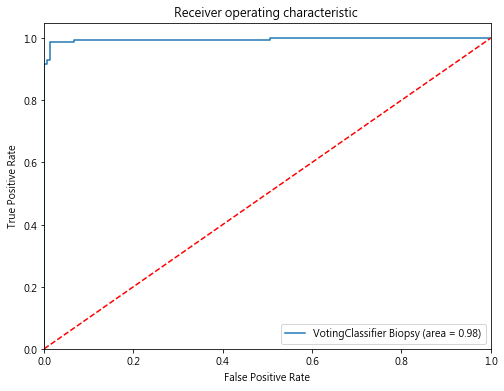

In [70]:
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, eclf1.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, eclf1.predict_proba(X_test)[:,1])
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (8,6))
plt.plot(fpr, tpr, label='VotingClassifier Biopsy (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()